# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

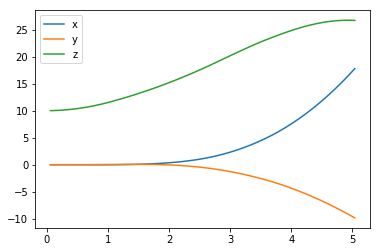

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

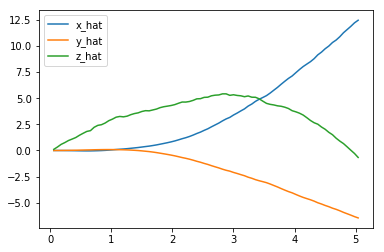

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

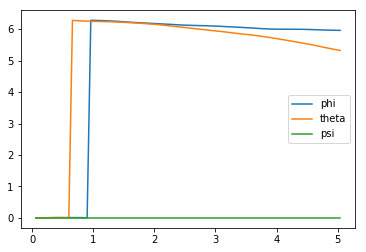

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

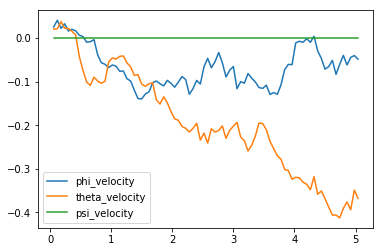

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

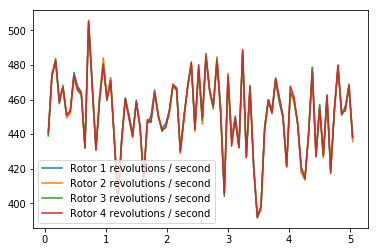

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 17.77366944  -9.84352555  26.68299858   5.96040194   5.32267622   0.        ]
[ 12.44692363  -6.44323661  -0.66489116]
[-0.04832933 -0.36793374  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.820 (best =  -0.022), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [3]:
## TODO: Train your agent here.
import sys
import pandas as pd
import numpy as np
import csv
from agents.agent import AE_DDPG_Agent # my developed agent
from task import Task

# AE: In the end my agent trains so well, that usually it doesn't need more than 100 episodes.
num_episodes = 100

best_score_yet = -np.inf

# AE: A list with episode rewards for plotting later
episode_rewards = []

# AE: X=8, Y=3, Z=0 AND copter is level AND copter is not rotating on any of the axis (all Euler angular velocities are 0)
init_pose = np.array([8., 3., 0., 0., 0., 0.])
init_velocities = np.array([0., 0., 0.]) # initially not moving
init_angle_velocities = np.array([0., 0., 0.]) # initially stable
target_pos = np.array([80., 30., 20.]) # We want to take off and hover at the height of 10

# If copter doesn't crash, the episode lasts for this many time steps. We want this to be a reasonably long time,
# because otherwise the agent may try to rush to get to the desired position faster, than is safe.
# In the physics_sim.py: self.dt = 1 / 50.0, which means that runtime of 5 will give us an episode, that will last a
# maximum of 50 * 5 = 250 timesteps. I want at least 1000 timesteps to start with.
runtime = 5. 

task = Task(init_pose=init_pose, init_velocities=init_velocities, 
            init_angle_velocities=init_angle_velocities, runtime=runtime, 
            target_pos=target_pos)

#agent = DDPG_Agent(task)
agent = AE_DDPG_Agent(task)
#agent = PolicySearch_Agent(task)


# AE: Preparing for storing of the episode data.
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
file_output = 'data.txt'

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)

    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            #agent.step(reward, done)
            state = next_state
            
            # AE: storing episode data
            # AE: This needs to be done only for the best score episode.
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            # AE: episode data stored
            
            if done:
                if (best_score_yet < agent.total_reward):
                    best_score_yet = agent.total_reward
                print("\rEpisode = {:4d}, episode reward = {:7.3f} ep. avg. reward = {:7.3f}, best ep. avg. reward = {:7.3f} (best reward in all episodes yet = {:7.3f})".format(
                    i_episode, agent.total_reward, agent.score, agent.best_score, best_score_yet), end="")  # [debug]
                #print("Noi=", agent.noise.sample())
                episode_rewards.append(agent.total_reward)
                break
    sys.stdout.flush()

Episode =  100, episode reward = 760.104 ep. avg. reward =   9.049, best ep. avg. reward =  10.702 (best reward in all episodes yet = 926.129)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

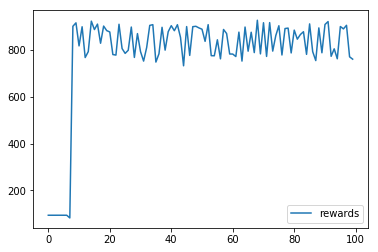

In [4]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(num_episodes), episode_rewards, label='rewards')
#plt.plot(range(100), episode_rewards[:100], label='rewards')

plt.legend()
_ = plt.ylim()

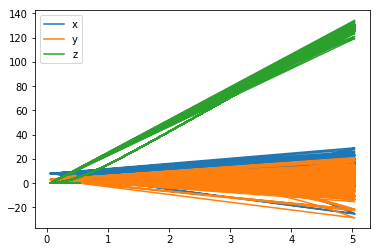

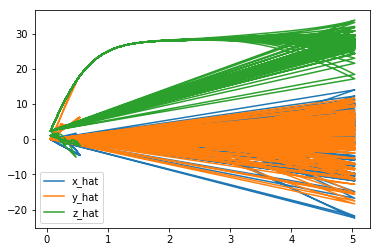

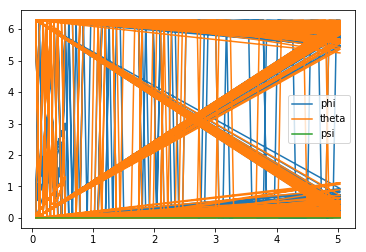

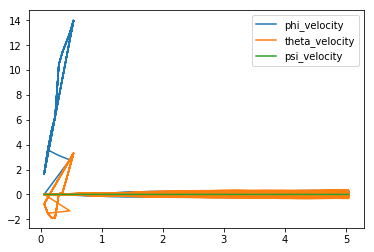

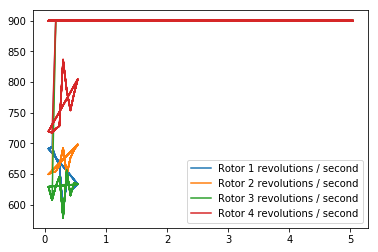

In [5]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline

# AE: Preparing for reading of the episode data.
#labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
#          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
#          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
#results = {x : [] for x in labels}
#file_input = 'data_pose_and_angular_v.txt'
#
#with open(file_input) as csvfile:
#    reader = csv.DictReader(csvfile)
#    for row in reader:
#        lrow = list(row.values())
#        for ii in range(len(lrow)):
#            results[labels[ii]].append(lrow[ii])
#        #for v in row.values():
#        #    print(v)
#        #print (row)
#        #for k, v in row.items():
#        #    c+=1
#        #    results[k].append(v)

# AE: Position
plt.figure()
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

# AE: Velocity
plt.figure()
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

# AE: Stability (Euler angles)
plt.figure()
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

# AE: Stability (Euler angular velocity)
plt.figure()
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

# AE: Rotor actions
plt.figure()
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task is to take off from point (8, 3, 0) and to fly to (80, 30, 50) and stay hovering there at the height of 50. X = 8 and Y = 3 are just my lucky numbers and could have been other values. Z = 50 is just a half of 100 and also could be a different value, but should not be 0, if the initial Z = 0, because then my reward function would penalise the quadcopter for taking off.

I have commented my reward function in quite a detail in the code, so please check that for all details, but the general idea is this (also copied and pasted from my comments in the code):

Three main ideas for the reward:

1) Reward for being closer to the target
 
2) I could also reward the agent for having higher speed at the beginning and reducing it as it gets closer. That should help it to not overshoot or undershoot. To achieve that, I will need to take into account the remaining distance in each dimension and each value of the speed vector. Perhaps I want the speed to be the same as the remaining distance. I.e. if the copter is 10m away from the target, then it should move towards the target at 10m/s, then after 1/10s = 100ms, it will be 9m away from the target and it should reduce its speed to 9m/s, then 1/9 s later it will be 8m away and so on, which will increase the time it takes to reach the target (instead of 1s, it would now take: 1/10 + 1/9 + 1/8 + 1/7 + 1/6 + 1/5 + 1/4 + 1/3 + 1/2 + 1 = 2.93s), but it would not overshoot anymore.

3) Reward the quadcopter for being level (the angular positions being as close to 0 as possible) as that will ensure smooth riding with fewer falls.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- I went straight to the provided code for DDPG algorithm and worked with that. In the end I got a useful solution.
- The final choice for hyperparameter tau (which kind of corresponds to the $\alpha$ parameter in Temporal Difference methods) is 0.0001. Other important parameters and considerations: 
- Exploration probability is replaced with noise magnitude for propellers. Noise starts at 0.1 and decays to 0.0001. I used an algorithm that was earlier shown in lectures. I start the noise at 1 and decay it to 0.001, but I also multiply that by another magnitude coefficient of 0.1 for my own convenience. And the decay rate for the this noise is 0.003.
- Ornstein - Uhlenbeck noise parameters are left unchanged: $\mu$=0, $\theta$=0.15 and $\sigma$=0.2
- Replay buffer and replay batch size- also unchanged: 100000 and 64 respectively
- $\gamma$=0.99
- Number of action repeats- also unchanged: 3
- Neural network architecture was unchanged from the provided classes: For Actor: 3 layers with relu activation function (sizes: 32-64-32). For Critic: 2 layers with relu activation function (sizes: 32-64) for both- state and action networks. I did experiment with dropout layers in both Actor and Critic, but in the end didn't find that necessary.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: 
- This was not an easy task, but only because I wanted to cut corners. I was very short of time, so I decided to take advantage of the provided Actor, Critic and Agent classes and later regretted that. Not that they were buggy or badly written, they were actually really good, but rather my own irrational assumptions about them wasted a lot of my time. Perhaps I could have avoided some of the "aha" moments, if I had written the Actor, Critic and Agent myself. The worst ones were these:
- Turns out that the class, that provides Ornstein-Uhlenbeck randomness, as convenient as it is, really only provides just that-- the random numbers. Turns out that I still need to build my own strategy for exploit vs explore behaviour and of course decide how exactly are those random numbers going to affect the rotor speeds. That was a pretty embarassing moment :)
- It also turns out that weights of the neural networks in Actor and Critic are updated directly from the agent via the "soft_update" method and learning rate used there is the "tau" parameter and we really DO NOT need to tweak another learning rate, when defining the optimiser in Keras (or rather the learning rate there should be 1).
- After all the hard work, the agent now learns really well. The action replay concept does wonders and it only takes a few tens of episodes, if that, to raise the reward from 8-20 up to 500-800 and that's where it stays for the rest of the simulation. It learns really fast. I am proud of it. :)

By the way there these other considerations there:
- Sometimes (maybe 1 in about 5 simulations) the physics_sim.py class returns pose and velocities (sim.pose and sim.v) as NaN-s. Obviously I can't do calculations with that and in such case I abort the run (see my task.py)
- On other occasions (again maybe 1 in 5 simulations) the initial weights are so bad, that it doesn't learn and instead just whizzes through all the episodes with little reward.
- But in all other cases doing 1000 or more episodes takes a very long time, because the quadcopter tends to stay in the air for most of the episode. That's why I've reduced the number of episodes in a simulation run to 100.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
- This was one of those projects that seemed so easy at the start, but turned out to be a real trouble. The hardest part was to finally come to realisation that it was not going to be fine after just tweaking a few parameters. The hard part was to give up the idea of "I only need to tweak this one hypeparameter" and to actually go through the provided Actor, Critic and Agent classes line by line and understand the code. Only after careful study of Actor, Critic, Agent and OU_Noise classes, I could understand what to do with my hyperparameters and how to organise noise. And only after careful study of the physics_sim.py class, I finally understood what is the best strategy for my reward function.
- It was interesting, but more importantly- useful to actually take the pain and understand the learning method. It is very satisfying to know that I really did teach a quadcopter to fly and that I can do this in the future with other robots. 

- And thank you guys for the automatic 4-week extension. I really needed that. There was so much to learn in the last module, and to be able to understand and think about it, I really needed some extra time. Without the extension, I would have not made it. Thanks!